In [1]:
#!pip install pandas
#!pip install seaborn

In [2]:
import pandas as pd

df1 = pd.read_json('./logs/basic/final.json')
df2 = pd.read_json('./logs/form/final.json')

# merge the df by adding a column to each df with value basic for df1 and form for df2
df1['type'] = 'basic'
df2['type'] = 'form'

# merge the two dataframes
df = pd.concat([df1, df2])

prompts = pd.read_json('./prompts/prompts.json')

# join based on id column
df = df.join(prompts.set_index('id'), on='id', lsuffix='_left')

In [3]:
# replace result == Conversation aborted with result == Max iterations reached since they are equivalent
df['result'] = df['result'].replace('Conversation aborted', 'Max iterations reached')
df['result'] = df['result'].replace('Max iterations reached', 'Failure')
df['result'] = df['result'].replace('Successful execution', 'Success')

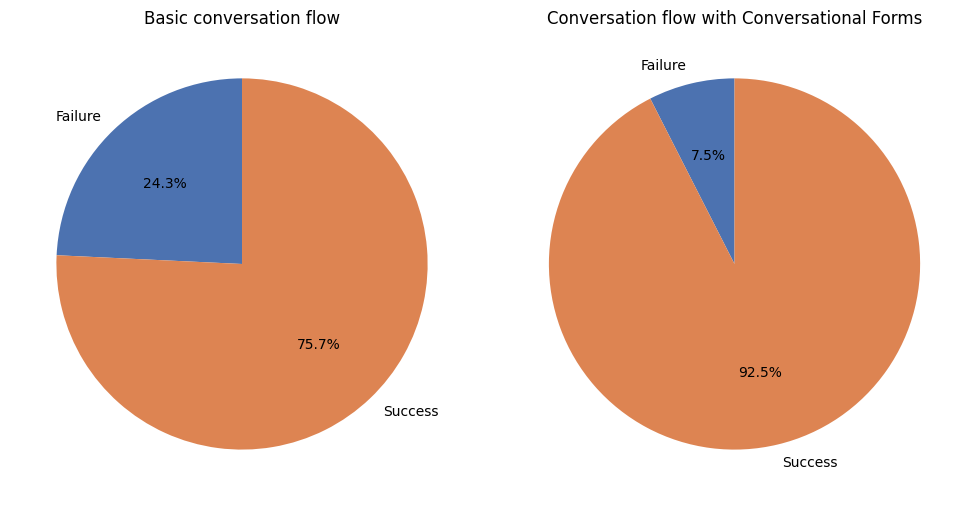

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your color palette
palette = sns.color_palette("deep", 2)  # Example: Using the 'husl' palette with 4 colors
sns.set_palette(palette)

# Calculate percentage of each result based on type
result_percentage = df.groupby('type')['result'].value_counts(normalize=True).mul(100).unstack()

# Plotting two pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, (idx, row) in enumerate(result_percentage.iterrows()):
    ax = axs[i]
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90)
    label = 'Basic conversation flow' if idx == 'basic' else 'Conversation flow with Conversational Forms'
    ax.set_title(label)

plt.tight_layout()
plt.show()

fig.savefig('result_percentage.png')

result                         Failure  Success
type  tool                                     
basic GmailRetriever              20.0     60.0
      GmailSender                 18.0     62.0
      GoogleCalendarCreator       15.0     65.0
      GoogleCalendarRetriever      8.0     72.0
      OnlinePurchase              36.0     44.0
form  GmailRetriever               0.0     80.0
      GmailSender                 15.0     65.0
      GoogleCalendarCreator        8.0     72.0
      GoogleCalendarRetriever      4.0     76.0
      OnlinePurchase               3.0     77.0
result                         Failure  Success
type  tool                                     
basic GmailRetriever            0.2500   0.7500
      GmailSender               0.2250   0.7750
      GoogleCalendarCreator     0.1875   0.8125
      GoogleCalendarRetriever   0.1000   0.9000
      OnlinePurchase            0.4500   0.5500
form  GmailRetriever            0.0000   1.0000
      GmailSender               0.1875  

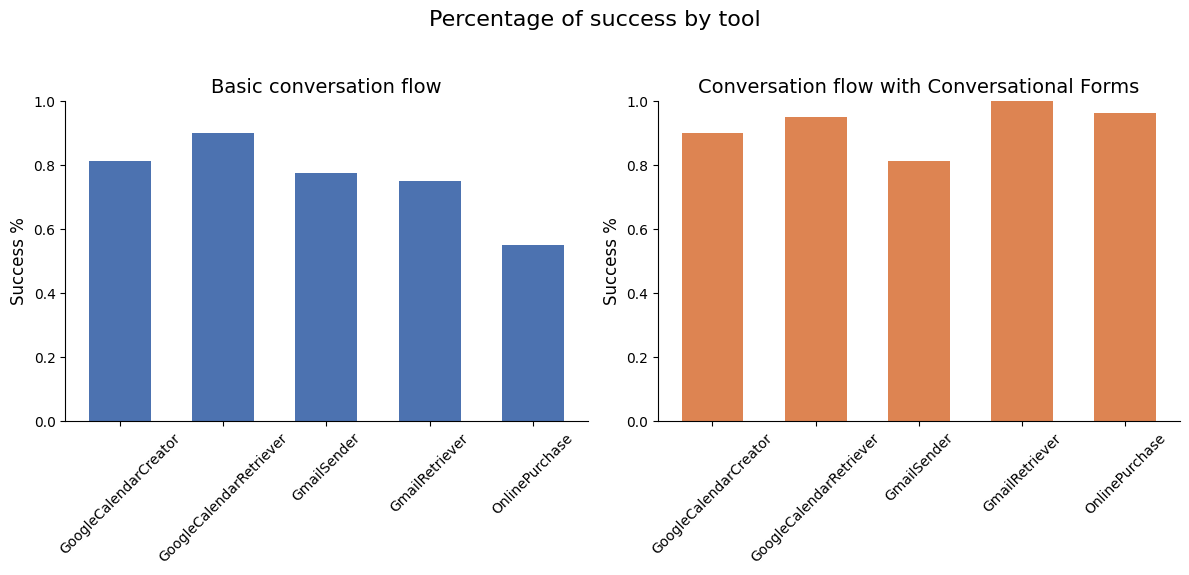

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate count of each result for each type and tool
result_count = df.groupby(['type', 'tool', 'result']).size().unstack().fillna(0)
# Calculate percentage of one result over the other
result_percentage = result_count.div(result_count.sum(axis=1), axis=0)
print(result_count)
print(result_percentage)

# Plotting two bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set figure title
fig.suptitle('Percentage of success by tool', fontsize=16)

for i, type_ in enumerate(df['type'].unique()):
    type_data = result_percentage.loc[type_]
    for tool in df['tool'].unique():
        percentages = type_data.loc[tool]
        # Using the same color for tools within the same type
        axes[i].bar(x=f'{tool}', height=percentages, label=f'{type_} - {tool}', color=sns.color_palette()[i], width=0.6)

    if type_ == 'basic':
        axes[i].set_title('Basic conversation flow', fontsize=14)
    else:
        axes[i].set_title('Conversation flow with Conversational Forms', fontsize=14)
    axes[i].set_ylabel('Success %', fontsize=12)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    sns.despine(ax=axes[i])


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# print to png
fig.savefig('result_percentage_by_tool.png')

result                                Failure  Success
type  use_case                                        
basic ALL_INFORMATION_FIRST_MESSAGE         9       91
      CONFUSED_USER                        23       77
      MAIN_INFORMATION_FIRST_MESSAGE       37       63
      NO_INFORMATION_FIRST_MESSAGE         28       72
form  ALL_INFORMATION_FIRST_MESSAGE         1       99
      CONFUSED_USER                        11       89
      MAIN_INFORMATION_FIRST_MESSAGE       11       89
      NO_INFORMATION_FIRST_MESSAGE          7       93
result                                Failure  Success
type  use_case                                        
basic ALL_INFORMATION_FIRST_MESSAGE      0.09     0.91
      CONFUSED_USER                      0.23     0.77
      MAIN_INFORMATION_FIRST_MESSAGE     0.37     0.63
      NO_INFORMATION_FIRST_MESSAGE       0.28     0.72
form  ALL_INFORMATION_FIRST_MESSAGE      0.01     0.99
      CONFUSED_USER                      0.11     0.89
      MAIN

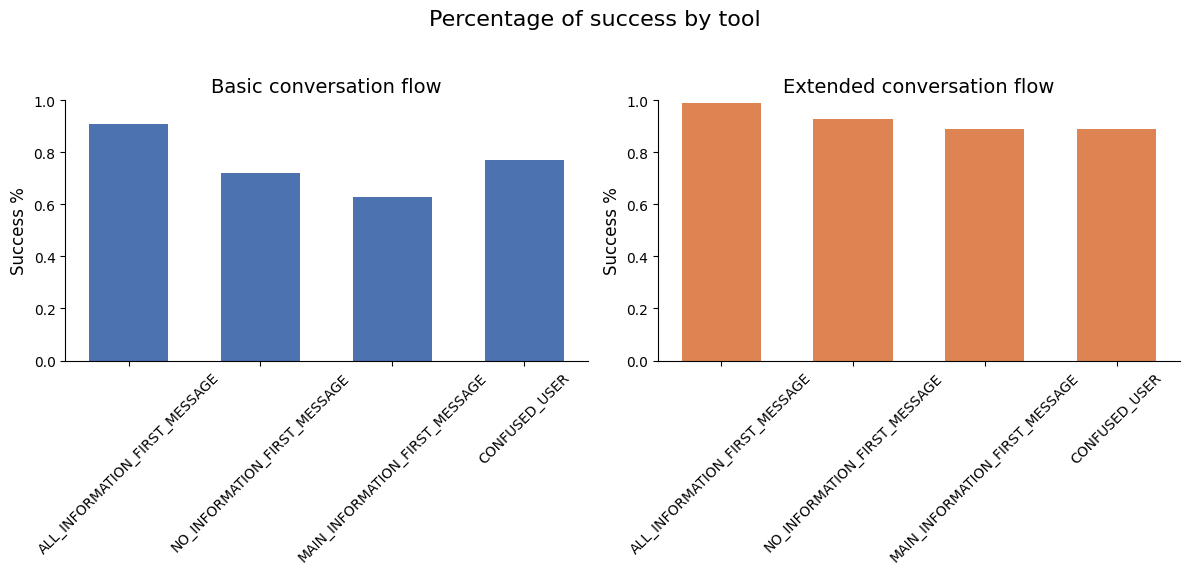

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate count of each result for each type and tool
result_count = df.groupby(['type', 'use_case', 'result']).size().unstack().fillna(0)
# Calculate percentage of one result over the other
result_percentage = result_count.div(result_count.sum(axis=1), axis=0)
print(result_count)
print(result_percentage)

# Plotting two bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set figure title
fig.suptitle('Percentage of success by tool', fontsize=16)

for i, type_ in enumerate(df['type'].unique()):
    type_data = result_percentage.loc[type_]
    for use_case in df['use_case'].unique():
        percentages = type_data.loc[use_case]
        # Using the same color for tools within the same type
        axes[i].bar(x=f'{use_case}', height=percentages, label=f'{type_} - {use_case}', color=sns.color_palette()[i], width=0.6)

    if type_ == 'basic':
        axes[i].set_title('Basic conversation flow', fontsize=14)
    else:
        axes[i].set_title('Conversation flow with Conversational Forms', fontsize=14)
    axes[i].set_ylabel('Success %', fontsize=12)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    sns.despine(ax=axes[i])


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# print to png
fig.savefig('result_percentage_by_use_case.png')